# Grupo 05 IA | Práctica 1

* Boris Carballa Corredoira
* Juan Carlos Villanueva Quirós
* Francisco Javier Blázquez Martínez

# Parte 2: Clasificación

### 1) Conjunto de datos
+ **Nombre**: breast_cancer.csv

+ **Descripción**: Este conjunto de datos breast_cancer_dataset es una base real de 569 casos de cancer de pecho de Wisconsin, siendo cada fila un caso de un tumor y cada columna sus características, y por cada característica nos dan 3 datos: media, desviación típica y caso peor.

+ **Variables**: Hay 10 características: radio, textura, perimetro, area, uniformidad (variaciones locales de la longitud de los radios), compactibilidad (perímetro^2/area - 1.0), concavidad (medido segun su severidad), número de zonas cóncavas, simetría y dimensión fractal ("approximación del tamaño del borde" - 1).

+ Los tumores se clasifican en dos clases: 212 tumores malignos y 357 benignos.

In [1]:
from sklearn.datasets import load_breast_cancer
breast_cancer_dataset = load_breast_cancer()

In [2]:
import pandas as pd

df = pd.DataFrame(data=breast_cancer_dataset['data'],
                  columns=breast_cancer_dataset['feature_names']) 
df.shape

(569, 30)

In [3]:
#Añadimos una columna con la clase a la que pertenece:
df['result'] = breast_cancer_dataset['target']
dic_target = { 0 : 'malignant', 1: 'benign'}
df['result'] = df['result'].map(dic_target)
df['result'].value_counts()

benign       357
malignant    212
Name: result, dtype: int64

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [5]:
#Mostramos el nombre y tipo de cada variable
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [6]:
#Mostramos los estadisticos
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Representación

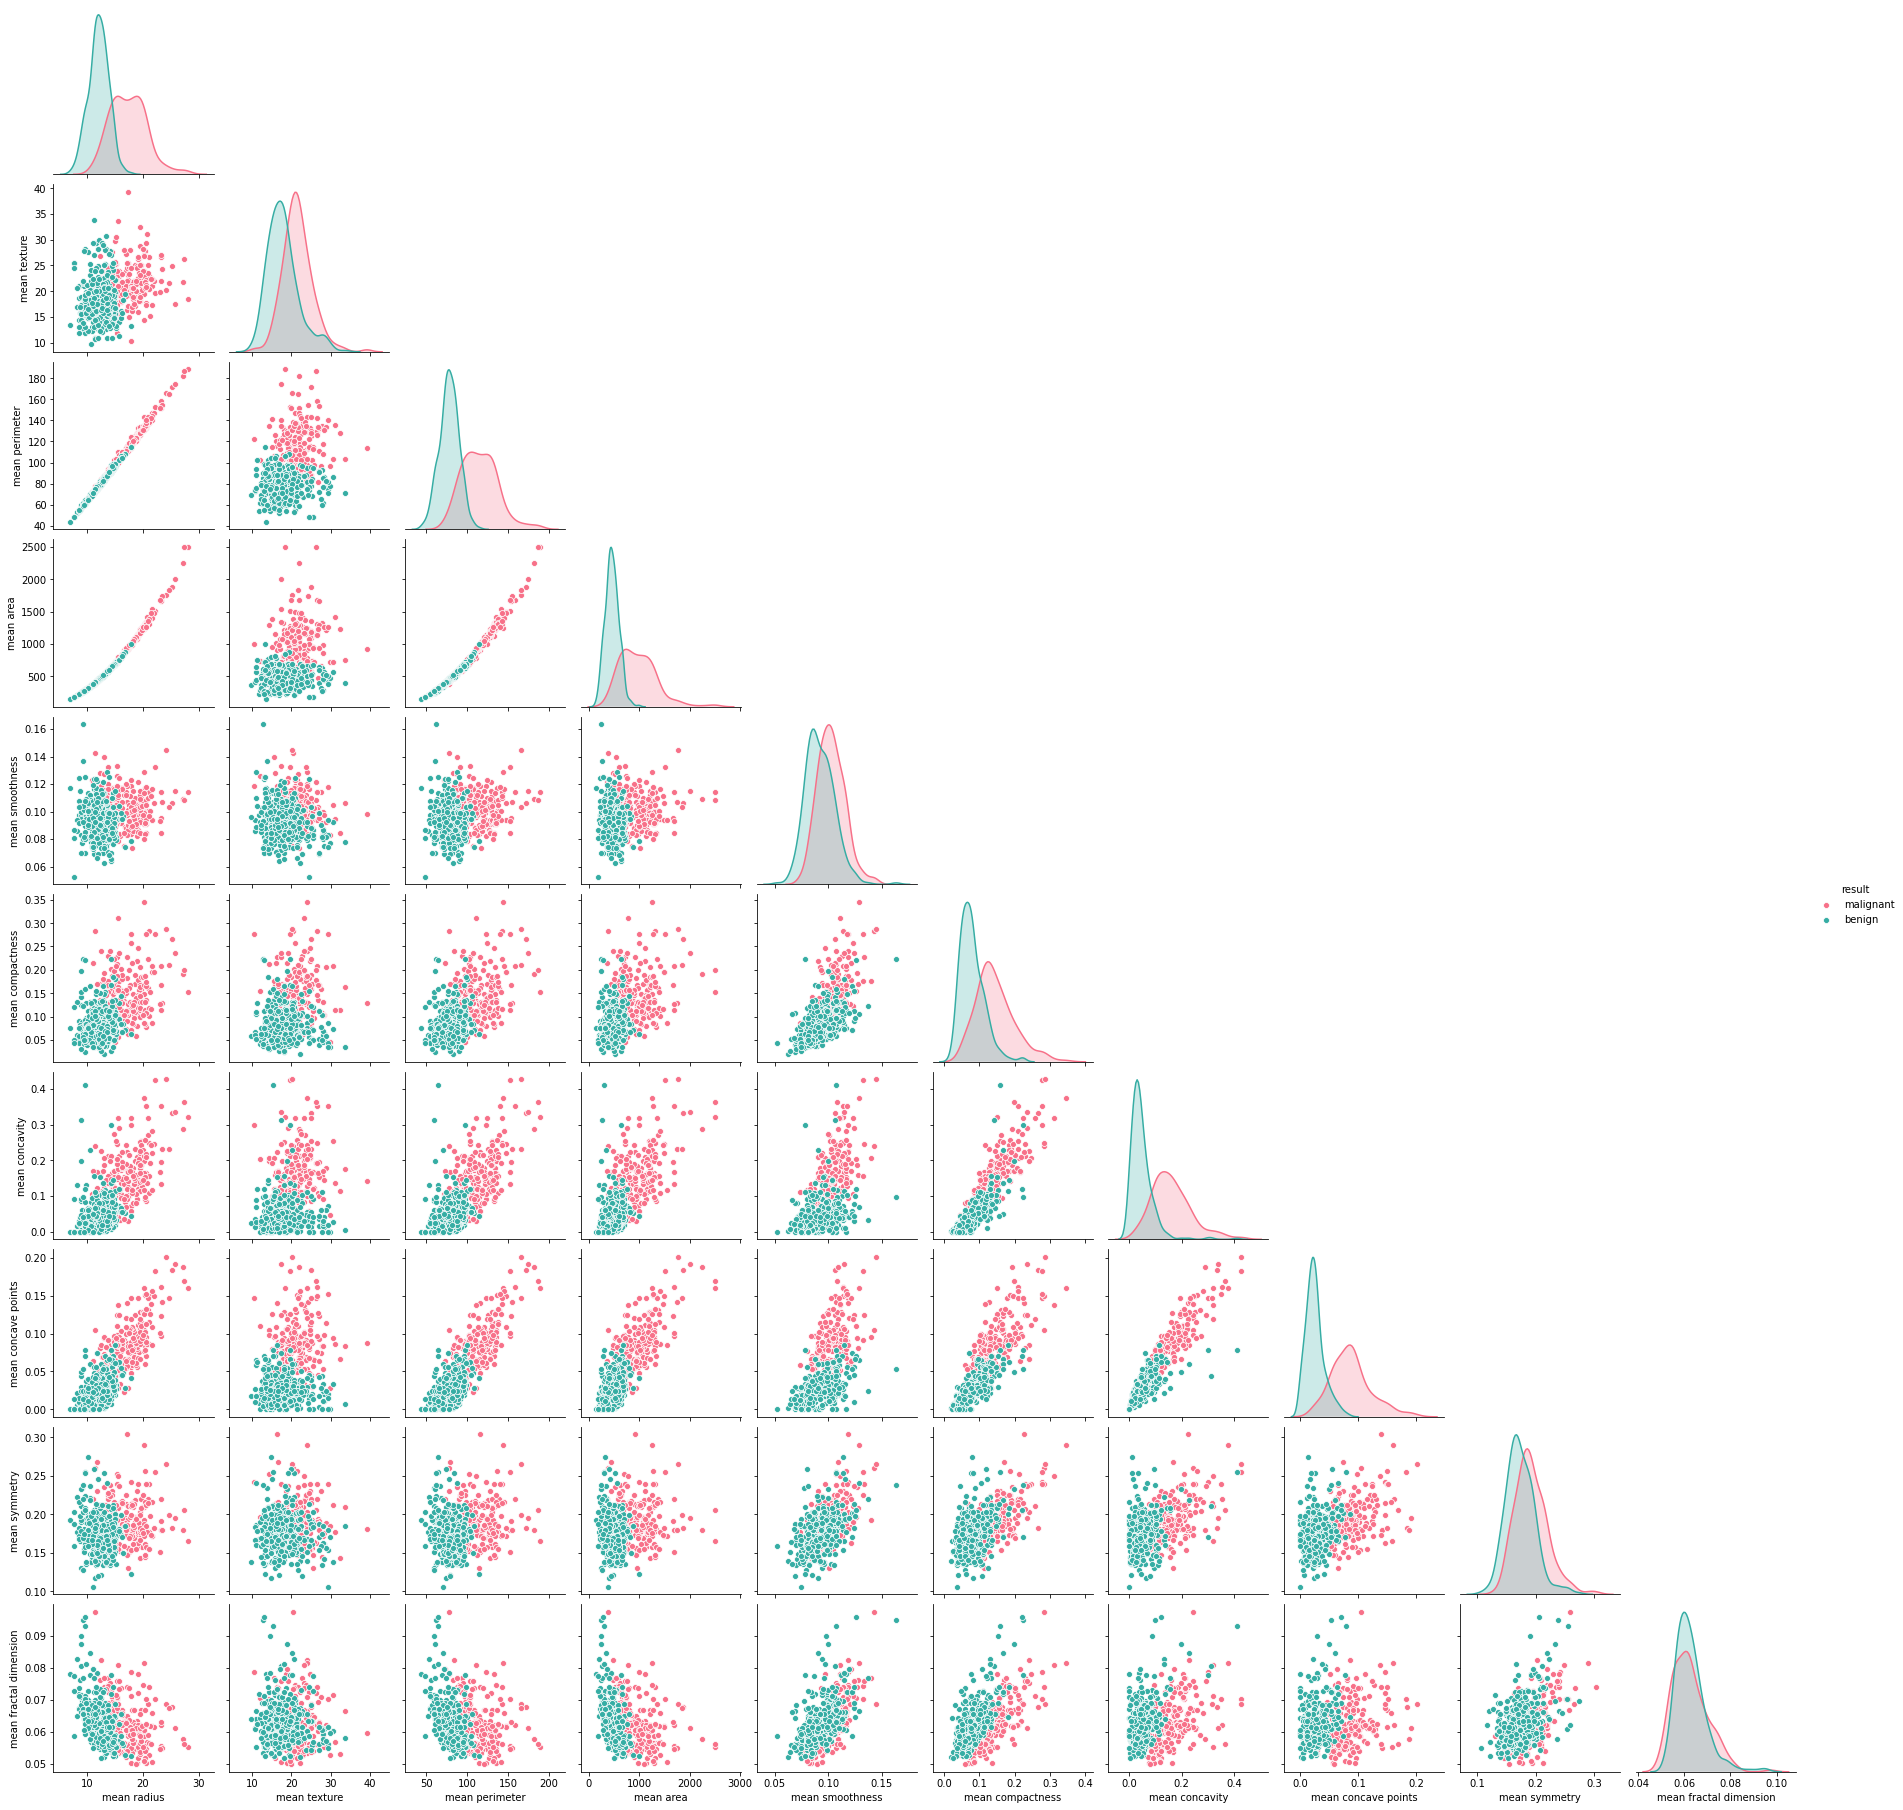

In [7]:
import seaborn
seaborn.pairplot(df, corner=True, hue="result", 
            vars=breast_cancer_dataset['feature_names'][0:10],
            palette="husl")

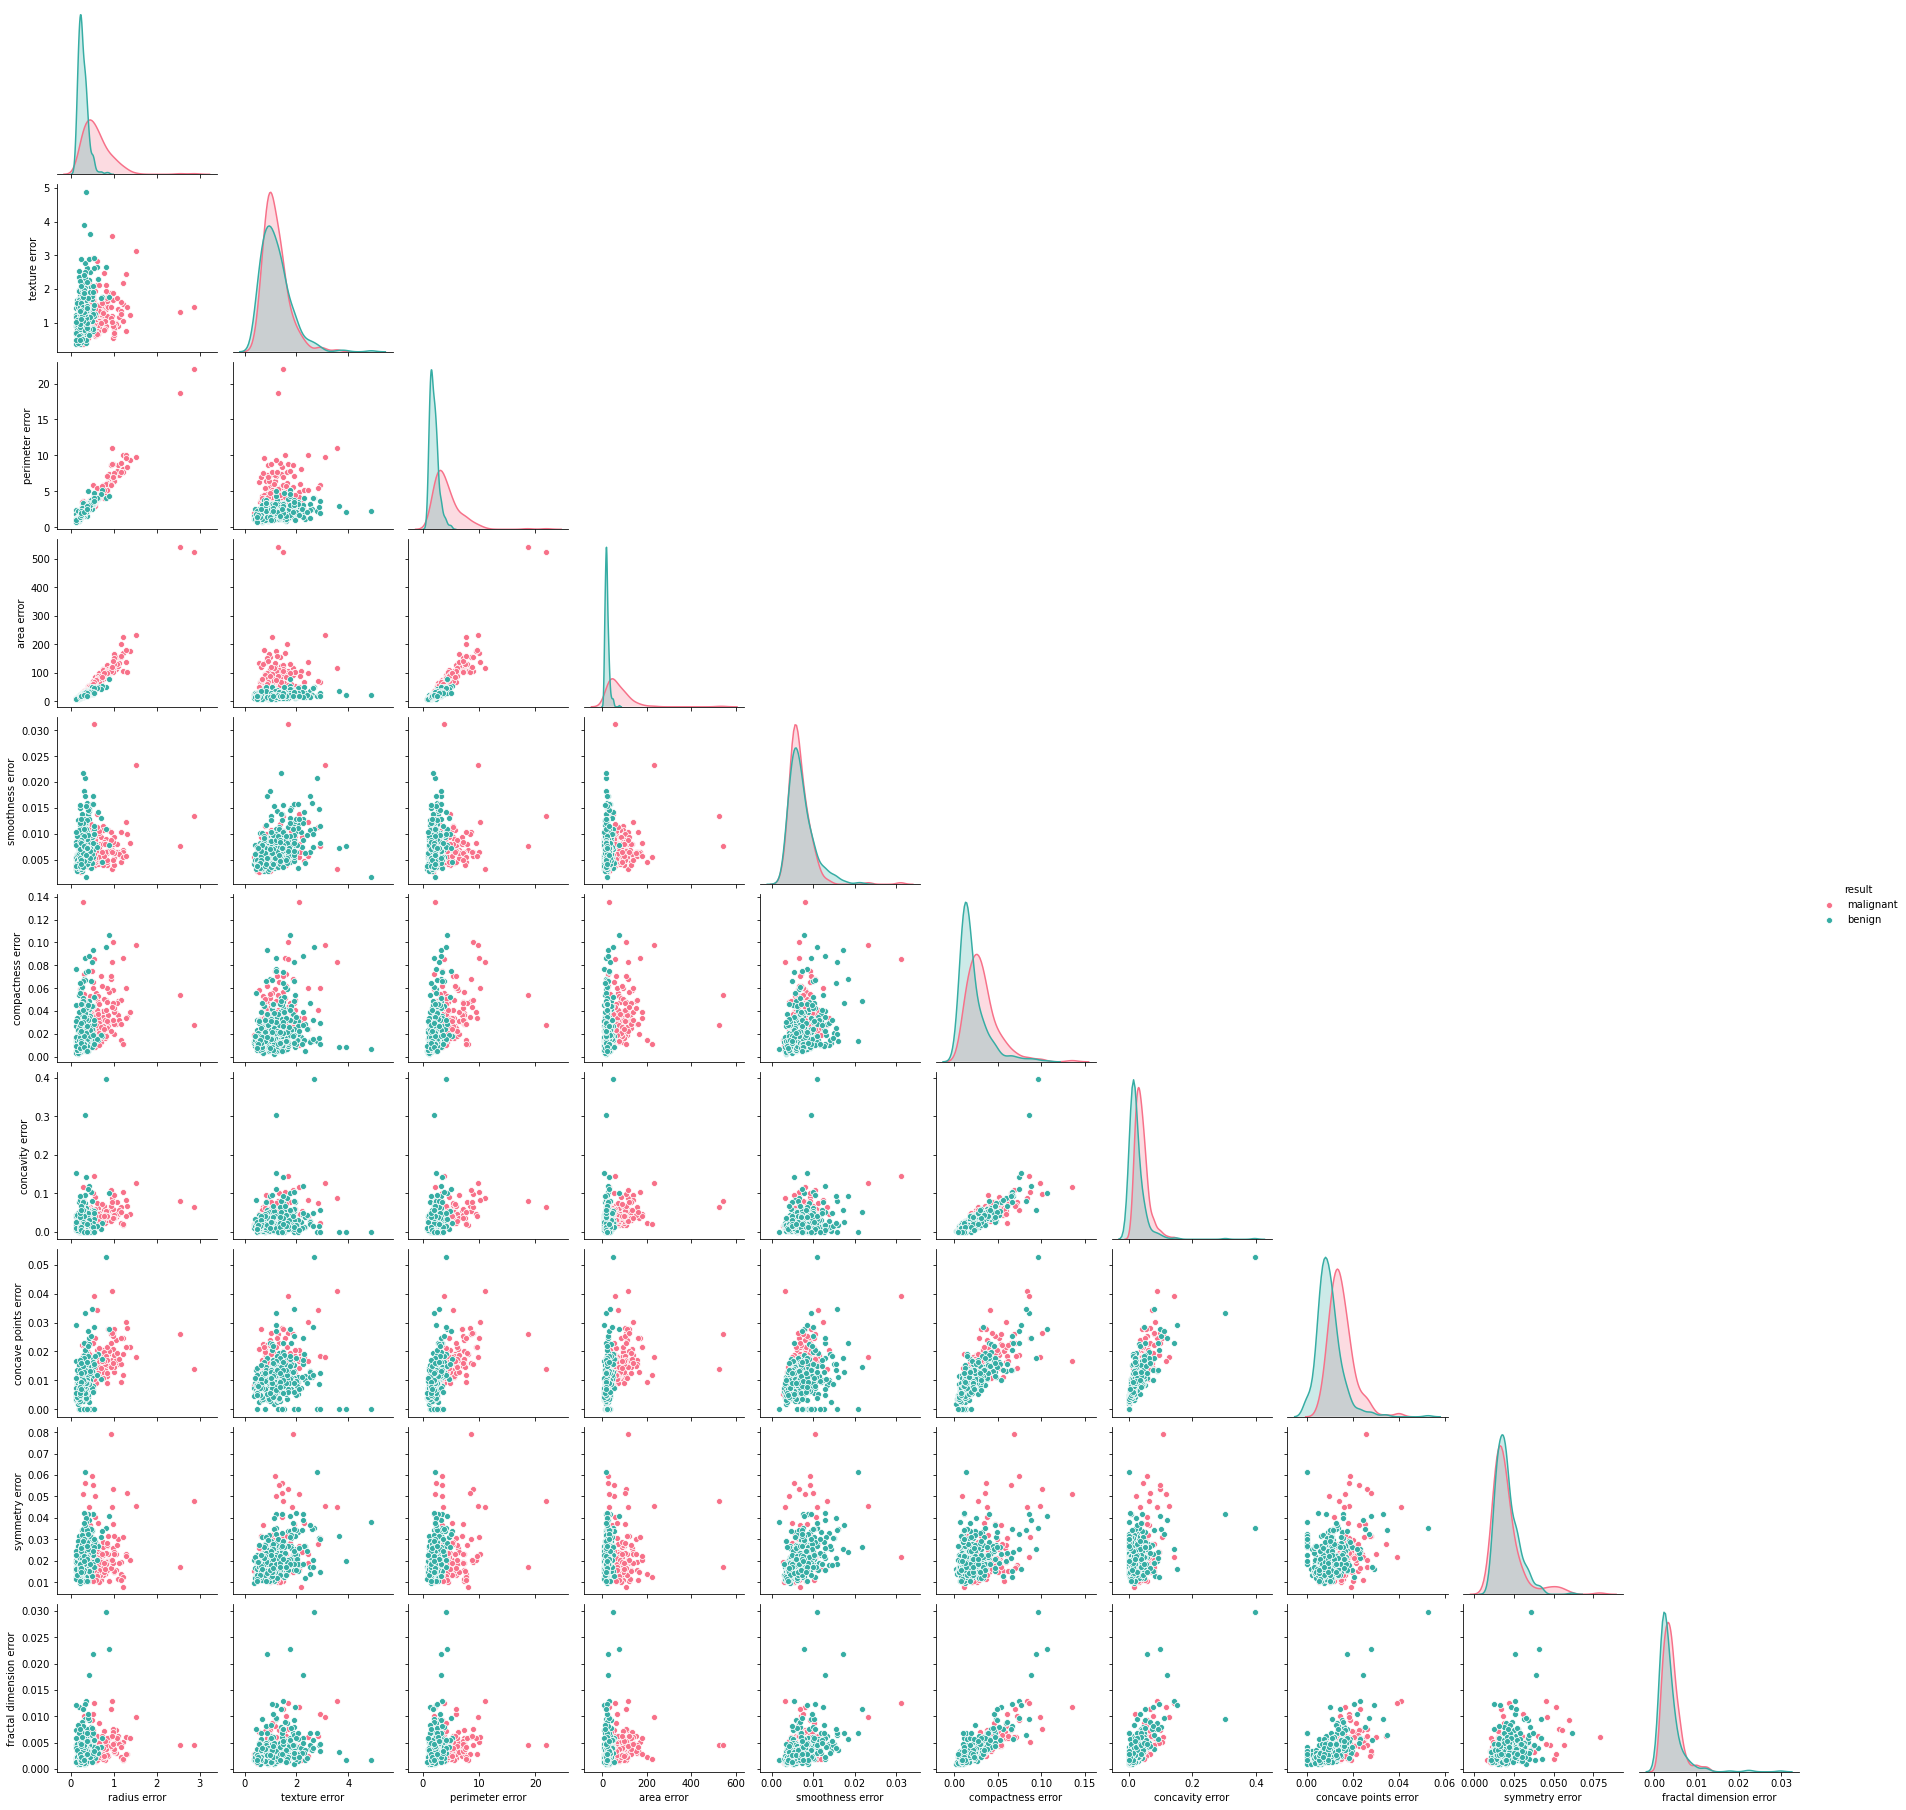

In [8]:
seaborn.pairplot(df, corner=True, hue="result", 
            vars=breast_cancer_dataset['feature_names'][10:20],
            palette="husl")

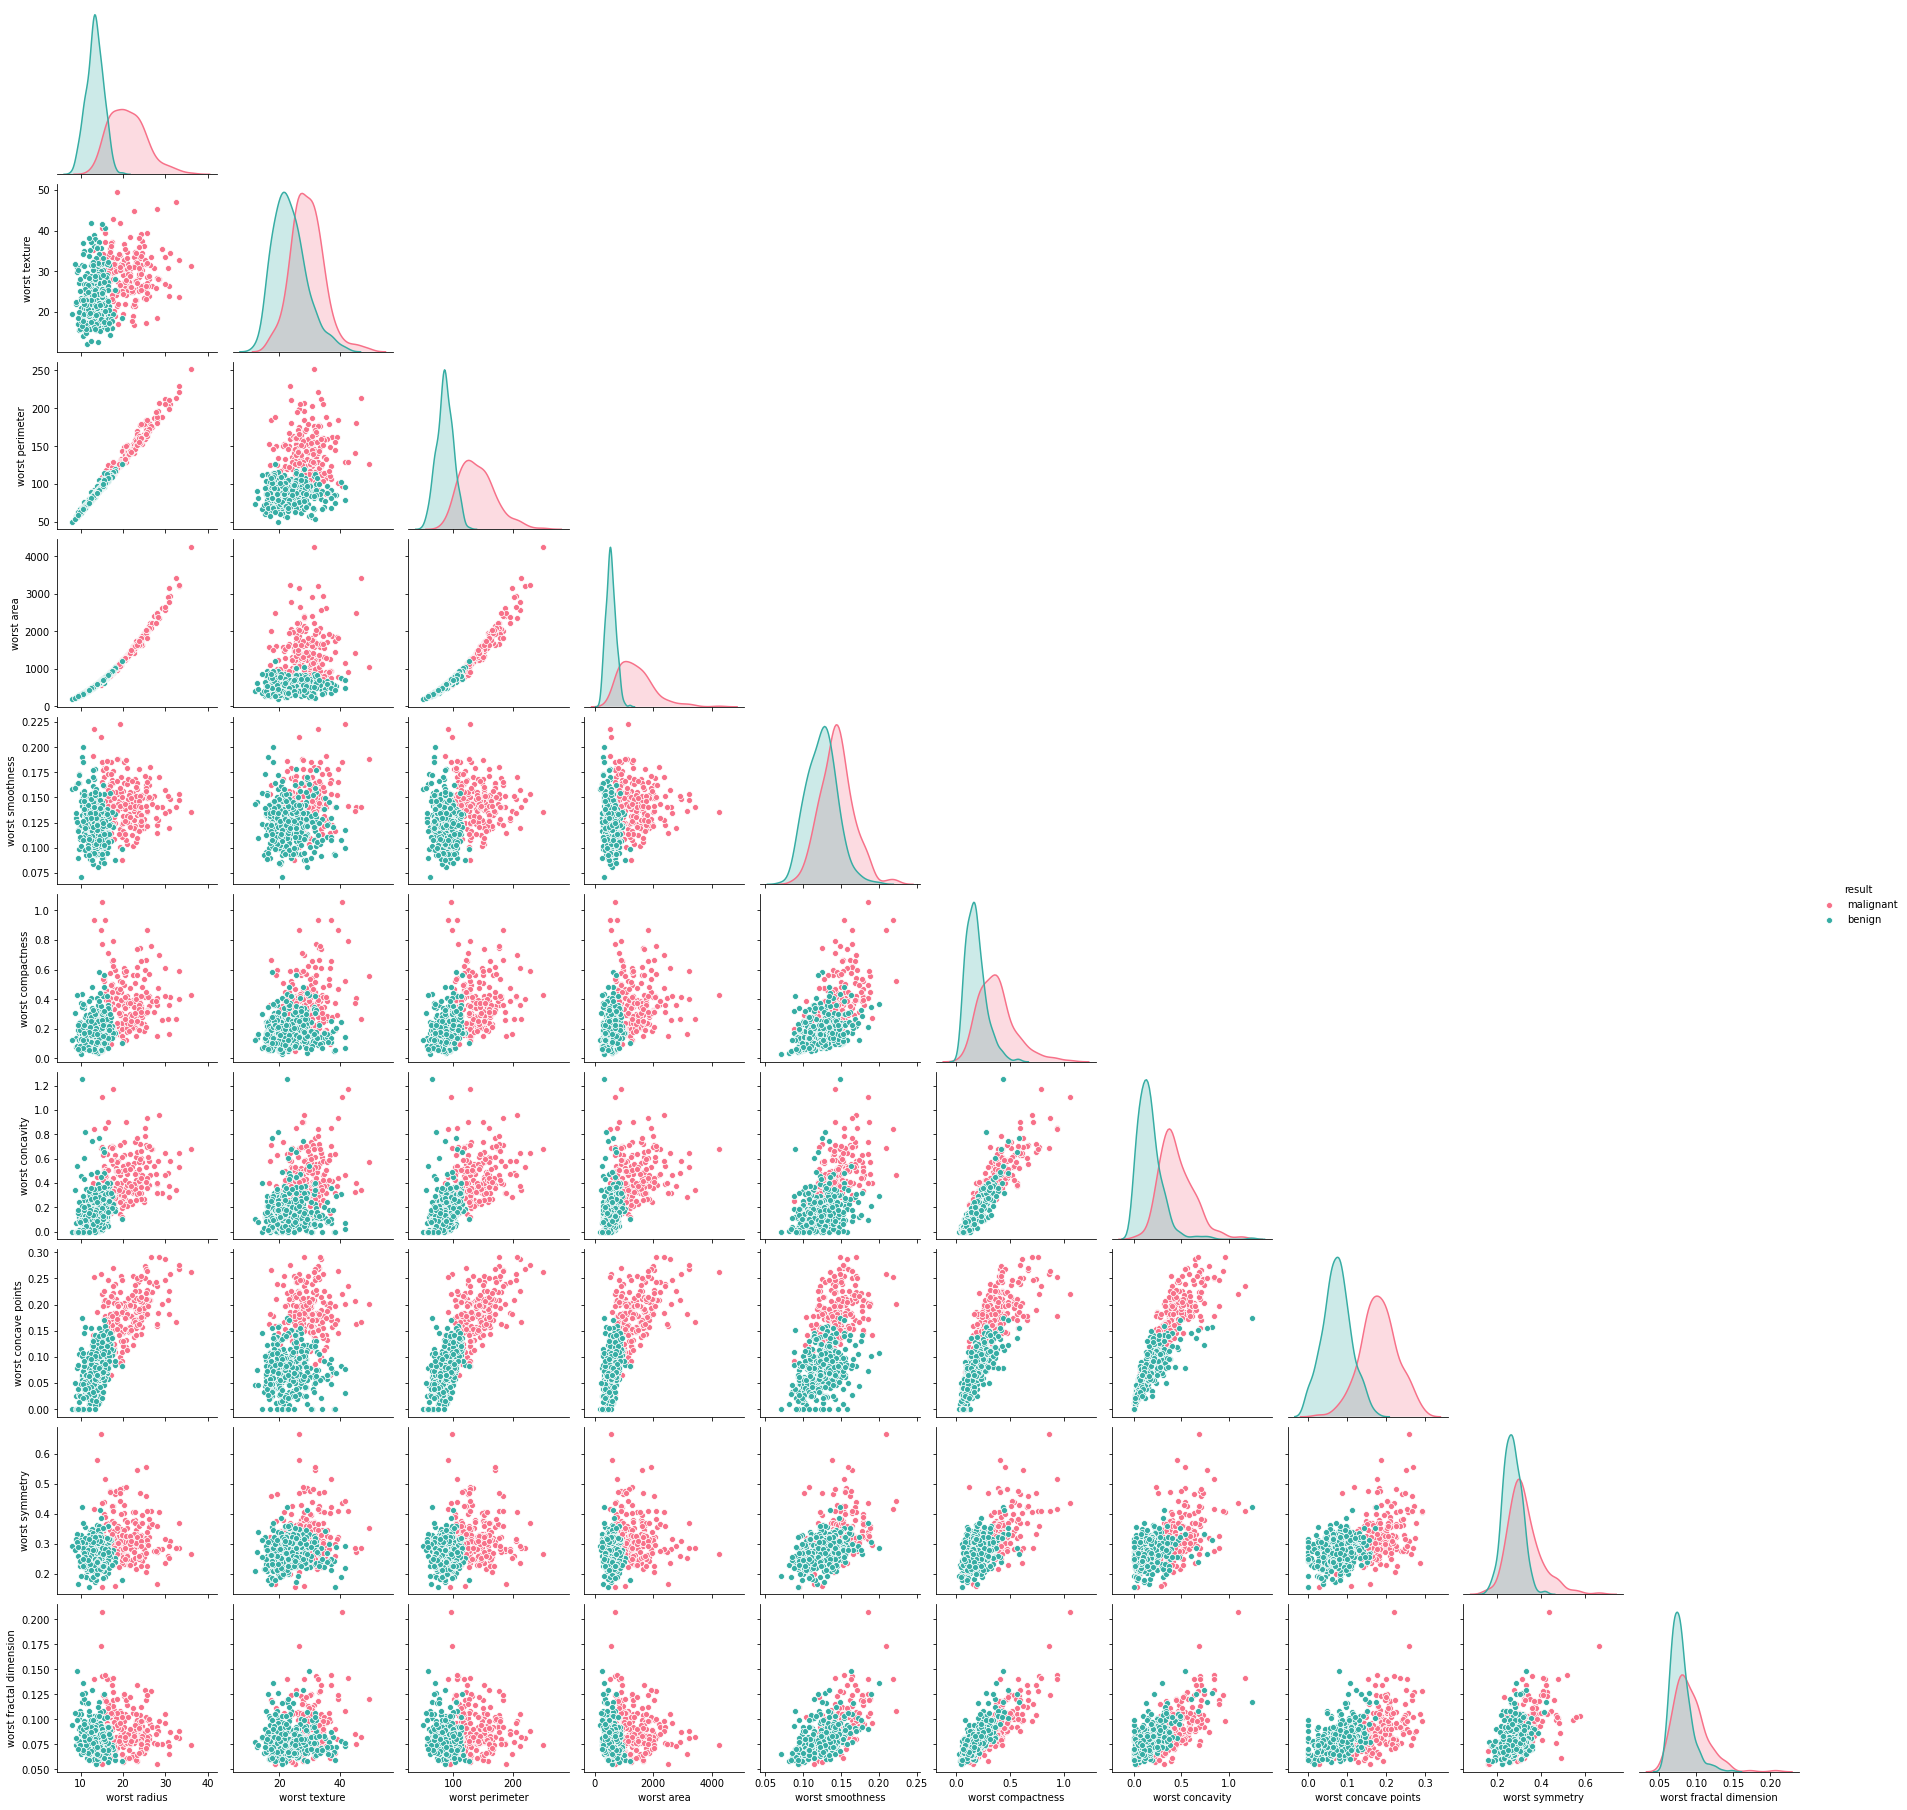

In [9]:
seaborn.pairplot(df, corner=True, hue="result", 
            vars=breast_cancer_dataset['feature_names'][20:30],
            palette="husl")

#### Conclusiones

En las medias y en los casos peores: en general los datos aparecen bastante separados, por lo que hay una clara correlación entre el aumento del valor en ciertas variables y el estado final del tumor: benigno o maligno, siendo este el correspondiente a los valores más altos.
Las variables que más claramente separan parecen ser: radio, perímetro, área, concavidad y puntos cóncavos.

Las variables del tipo rango de error tienen un alcance mucho menor a la hora de ayudar a distinguir entre ambos tipos, pues son más propensas a valores atípicos y a estar entremezcladas las dos clases.

### 2) Normalizar/Estandarizar

No es necesario estandarizar pues no hay medidas del mismo tipo pero distinta proporción. Además, si normalizásemos obtendríamos la misma dispersión en otra escala, con lo que el cálculo de la entropía no variaría. Al no influir en la entropía, el árbol de decisión sería el mismo, salvo que en cada nodo las preguntas serían las mismas pero acerca de los datos normalizados.

En resumen, al no usar las distancias entre datos en el cálculo del árbol, la estandarización no es necesaria.

### 3) Partición de datos y árbol de decisión

De ahora en adelante, los datos introducidos los de la siguiente partición

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset.data,
        breast_cancer_dataset.target, test_size=0.3,
        random_state=0, stratify=breast_cancer_dataset.target)


Nota: parecía una buena idea usar validación cruzada como en el ejemplo, aunque optamos por usar la partición anterior pues parece ser lo que pide  el enunciado.

Hemos elegido variar la profundidad del árbol para regular el aprendizaje del árbol:

In [11]:
from sklearn.tree import DecisionTreeClassifier

train_accuracy = []
test_accuracy = []

max_depths = range(1, 10)
for md in max_depths:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2,
                random_state=0)
    clf = clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

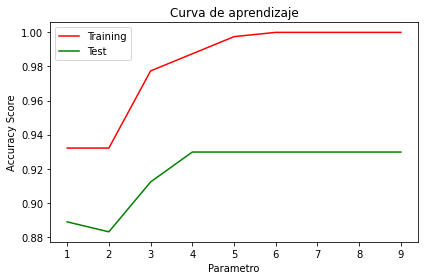

In [12]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

Para max_depth=4 obtenemos el mejor resultado, a partir de ahí no mejora en los casos de prueba (es decir, no parece que vaya a generalizar mejor), solo en los casos de entrenamiento, por lo que lo estaríamos sobre-entrenando.

### 4) Pintado y análisis del árbol de decisión

Creamos el árbol creado en el apartado anterior con max_depth=4:

In [13]:
arbol4 = DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=2,
                             random_state=0)
arbol4 = arbol4.fit(X_train, y_train)

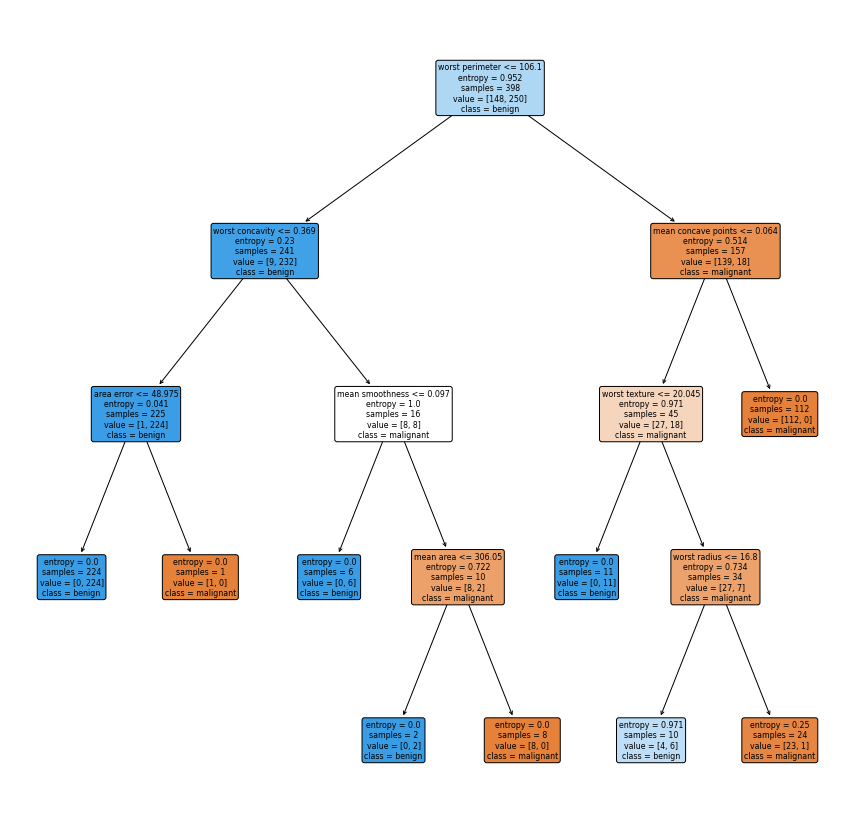

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plot_tree(arbol4, filled=True, feature_names=breast_cancer_dataset.feature_names,
          class_names=breast_cancer_dataset.target_names, rounded=True)
plt.show()

a)
La primera pregunta es sobre el peor caso de perímetro, que sirve para separar inicialmente los 398 casos en dos grupos de 241 (de los que 232 son benignos) y 157 (de los que más de 112 son malignos), así que parece una gran división inicial. Ha clasificado mejor los benignos, quedando casi todos identificados ya en el nivel 3.

Esa pregunta tiene sentido pues trata de quitar los casos raros de entre los benignos, y puede verse que la escogió porque en sus diagramas anteriormente pintados, la separación de clases parece producirse más verticalmente que en otras variables, por lo que conseguirá distinguir más en una pregunta de un nodo que el resto.

b)
Las variables más discriminantes en este árbol parecen ser: peor perímetro, media de puntos cóncavos, peor textura y peor concavidad. Parece que ha preferido las variables de peor caso en lugar de las de la media, seguramente porque aunque tengan una separación de clases similar, la inclinación más vertical de la 'línea' que las separa en el caso peor favorezca que el nodo separe mejor.

c)
Solo se usa una variable del tipo error y es para discernir un caso. Seguramente este sea su mayor utilidad, distinguir casos particulares y no ser un gran discriminante. Tampoco se han usado los tipos simetría o dimensión fractal, ambos parecían no ser de demasiada utilidad en los diagramas anteriores.

d)
Es poco generalizable el de error de area, pues solo distingue un caso por lo que parece sobre-entrenado.
Por otro lado, contienen confusión aquellos nodos hoja aún con entropía, como el nodo hoja con entropia 0.971, que la pregunta de peor radio no consiguió clasificar por completo dejando al nodo con la mitad de cada tipo.

### 5) Pintado de un árbol sub-óptimo sobreaprendido

In [15]:
arbol5 = DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_split=2,
                             random_state=0)
arbol5 = arbol5.fit(X_train, y_train)

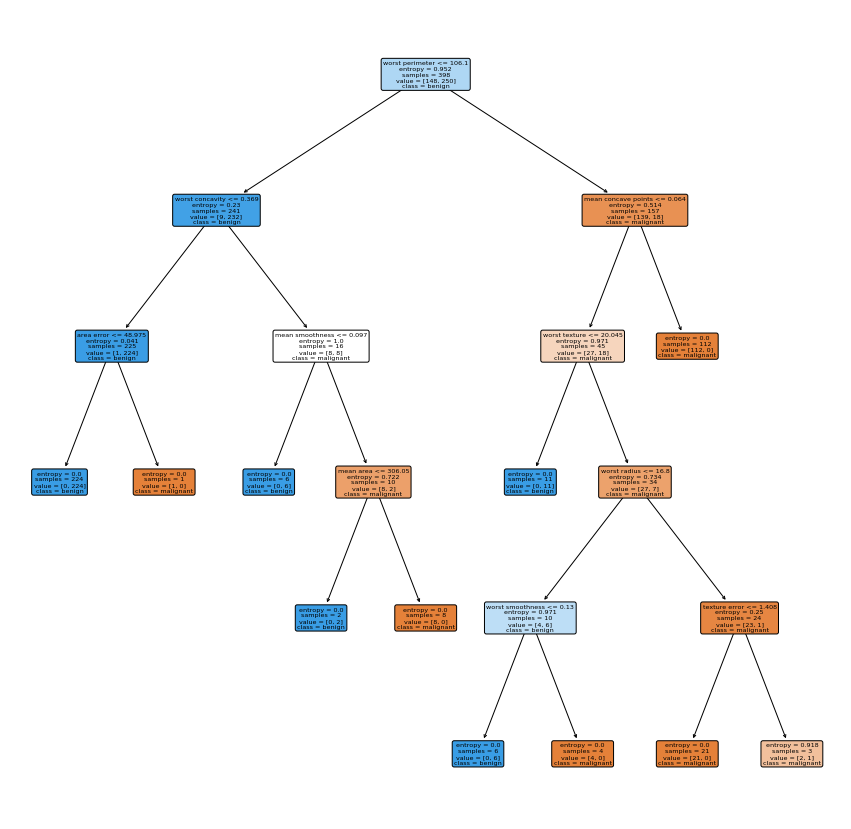

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plot_tree(arbol5, filled=True, feature_names=breast_cancer_dataset.feature_names,
          class_names=breast_cancer_dataset.target_names, rounded=True)
plt.show()

Se crean 4 nodos nuevos, ya que los dos nodos hoja del último nivel con entropía positiva se han convertido en nodos no terminales de los que salen 2 nodos hoja en cada uno. La alta empatía de uno de los viejos nodos ha desaparecido con hacer una pregunta sobre la peor uniformidad, con lo que quedan ya esos casos correctamente clasificados. El otro nodo hoja antiguo se asegura ahora de que casi todos son malignos, quedando tan solo 3 casos por discernir.

Este árbol se ve que es buenísimo para esta entrada (solo 3 casos restantes por clasificar), pero su problema será que está especializado en esta entrada.

### 6) Matriz de confusión de los datos del test

In [17]:
results_pred = arbol4.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[ 58   6]
 [  6 101]]


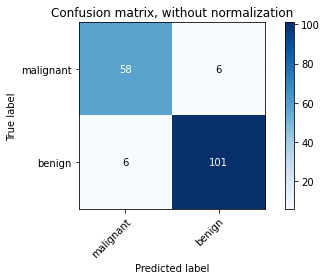

In [19]:
plot_confusion_matrix(y_test,results_pred, normalize=False, classes=breast_cancer_dataset.target_names)

In [20]:
VP = 0
FP = 0
FN = 0
VN = 0
for i in range(len(results_pred)):
    if results_pred[i]==1 and y_test[i]==1:
        VP += 1
    elif results_pred[i]==1 and y_test[i]==0:
        FP += 1
    elif results_pred[i]==0 and y_test[i]==1:
        FN += 1
    else:
        VN += 1

print("VP: "+str(VP)+"\nFP: "+str(FP)+"\nFN: "+str(FN)+"\nVN: "+str(VN)+"\n")

VP: 101
FP: 6
FN: 6
VN: 58



Recordatorio:

Precision = VP / (VP + FP) = "los positivos que aciertas entre los que predices"

Exhaustividad = VP / (VP + FN) = "los positivos que aciertas entre los que hay"

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, results_pred, 
        target_names=breast_cancer_dataset.target_names))

              precision    recall  f1-score   support

   malignant       0.91      0.91      0.91        64
      benign       0.94      0.94      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



Como el 1 representa los benignos, los resultados se corresponden a un test en el que el positivo tener tumor benigno. Hay pocos datos de fallo en las predicciones (más de un 90% de acierto), lo cual es bueno, aunque preocupan los falsos positivos (son en realidad tumor maligno).

Como hay los mismos FP que FN, recall y precision dan los mismos valores, que da mayor proporción de acierto a los benignos pues de estos hay más, haciendo más irrisorio el haber fallado en pocos.

### 7) Clasificador k-NN

a)
Las columnas escogidas para calcular las distancias son:

mean smoothness, mean concave points, worst perimeter, mean texture

b)
Las variables tienen escalas muy diferentes, por lo que es necesario reescalar pues el k-NN se basa en distancias. De no hacerlo, unas variables influirían más que otras.

In [22]:
#Reescalamos los datos de la partición usada para el árbol de partición
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) #Pasamos del cjto de train
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
import numpy as np
#Preparacion para a)
L = list(breast['feature_names'])
R = ['mean smoothness', 'mean concave points', 'worst perimeter',
    'mean texture']
indexes = []
for name in R:
    indexes.append(L.index(name))
#indexes contiene los índices de las columnas de las variables que usaremos

def remove_columns_matrix(matrix, indexes):
    new_list = []
    for row in matrix:
        new_list.append(row[indexes])
    return np.array(new_list)
    
breast_data = X_train_scaled # Con X_train pasa a estar sin normalizar
breast_data = remove_columns_matrix(breast_data,indexes)
#Hemos dejado solo las 4 columnas de L

breast_target = y_train

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn import neighbors

import matplotlib.pyplot as plt

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


train_k_results_mean=[]
train_k_results_std=[]
test_k_results_mean=[]
test_k_results_std=[]

rango_k=range(1,15)

k_values=rango_k

for k in rango_k: 
    clf = neighbors.KNeighborsClassifier(k, weights='distance', p=2)
    
    train_results=[]
    test_results=[]
    
    for train_index, test_index in skf.split(breast_data, breast_target):
        
        X_train_aux, X_test_aux = breast_data[train_index], breast_data[test_index]
        y_train_aux, y_test_aux = breast_target[train_index], breast_target[test_index]
        
        clf.fit(X_train_aux, y_train_aux)
        
        train_results.append(clf.score(X_train_aux, y_train_aux))
        test_results.append(clf.score(X_test_aux, y_test_aux))
    
    
    train_k_results_mean.append(np.mean(train_results))
    train_k_results_std.append(np.std(train_results))
    test_k_results_mean.append(np.mean(test_results))
    test_k_results_std.append(np.std(test_results))

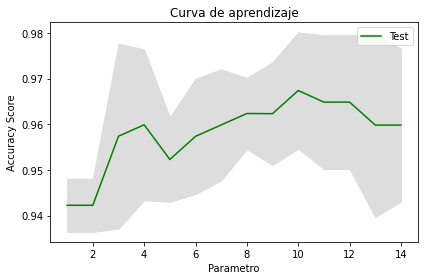

In [25]:
plt.plot(k_values, test_k_results_mean, color="g", label="Test")

lower_limit=np.array(test_k_results_mean)-np.array(test_k_results_std)
upper_limit=np.array(test_k_results_mean)+np.array(test_k_results_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

c)
Con k=4 tenemos un máximo local de precisión que es superado a partir de k=8, por lo que tenemos la opción de coger k=4 o por ejemplo k=10. Cogemos k=4 por ser mucho más pequeño.

Nota: para ver como sería sin haber reescalado los datos solo hay que cambiar breast_data de X_train_scaled a X_train, y da valores también en torno a 0.96, ligeramente peores aunque podría ser peor.

En el caso de coger todas las columnas, la precisión con los datos escalados era similar, pero sin escalar descendía hasta un 0.93. 

d)
Para comparar con los resultados de antes debemos meterle el mismo test, si no no podemos comparar. Por eso, los datos que le pasamos para su entrenamiento son del conjunto de entreno original, y ahora usamos los del conjunto de test para calcular la precisión.

In [26]:
from sklearn.model_selection import cross_val_predict

clf = neighbors.KNeighborsClassifier(4, weights='distance', p=2)

predictions = cross_val_predict(clf, X_test_scaled, y_test, cv=5)

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, 
        target_names=breast.target_names))

              precision    recall  f1-score   support

   malignant       0.93      0.88      0.90        64
      benign       0.93      0.96      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



Confusion matrix, without normalization
[[ 56   8]
 [  4 103]]


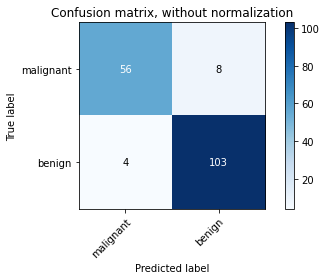

In [27]:
plot_confusion_matrix(y_test,predictions, normalize=False, classes=breast.target_names)

Ha aumentado la precisión del maligno (91% a 93%) y ha disminuído la precisión del benigno (94% a 93%). La exhaustividad ha pasado de 91% a 88% en los malignos y 94% a 96% en los benignos. Es un resultado muy parecido al correspondiente al árbol de decisión pero sutilmente peor, pues este tiene más falsos positivos, que recordemos significa que se dice que es benigno cuando es maligno. Esta cantidad en este problema concreto habría que minimizarla a 0 y se ve reflejada en la precisión de los benignos (acertar la predicción de un benigno) y en la exhaustividad de los malignos (acertar todos los malignos que hay), que debería ser o a cercarse a 1.0.